### Ran at following tags
MagD https://github.com/pnsn/magD/tree/v1.1

magd_client https://github.com/pnsn/magd_client/tree/v1.1

# Noise Study to look at detection thresholds with and without analog EHZ channels

In [1]:
##some constants for all plots

#path to local libraries
magd_client_path = '/Users/joncon/Sites/magd_client/'

#params for all profiles
lat_min=38.0
lat_max=52.0
lon_min=-130.0
lon_max=-115.0
resolution=0.1
num_solutions=4
nyquist_correction=0.4
mu=3e11
qconst=300.0
beta=3.5

#create dicts to hold grid paths
grid_paths={}

%matplotlib inline

In [2]:
#only run once
import os
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())
from magD.pickle import *
#set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

Working in /Users/joncon/Sites/magd_client


## SQL querries for UW, UO, and CC

### 4 channel stations with EHZ and ENZ or HNZ

Query for stations and output as csv file:
* sta
* seedchan
* net
* location


``` psql -h $AWS_POSTGRES_SERVER  -d pnsn_web_production -c "\copy (select c1.sta, c1.seedchan, c1.net, c1.location from channels c1, channels c2  where c1.net in ('UW','UO','CC') and c1.sta=c2.sta and c1.seedchan='EHZ' and c2.seedchan in  ('ENZ','HNZ')) to '~/4_component.csv' WITH (FORMAT CSV, HEADER TRUE, FORCE_QUOTE *);"```

### All Broadband

``` psql -h $AWS_POSTGRES_SERVER  -d pnsn_web_production -c "\copy (select sta, seedchan, net, location from channels  where net in ('UW','UO','CC') and  seedchan in  ('BHZ','HHZ')) to '~/all_bb.csv' WITH (FORMAT CSV, HEADER TRUE, FORCE_QUOTE *);"```

###  EHZ  with ENZ or HNZ

```psql -h $AWS_POSTGRES_SERVER  -d pnsn_web_production -c "\copy (select sta, seedchan, net, location from channels  where net in ('UW','UO','CC') and  seedchan ='EHZ') to '~/ehz.csv' WITH (FORMAT CSV, HEADER TRUE, FORCE_QUOTE *);" ```

## Query FDSN using above CSV and output CSV with location and samprate

With above csv files, query FDSN to produce csv file of format:
* sta
* chan
* net
* loc
* lat
* lon 
* depth
* on_date
* off_date
* rate

In [10]:
#!pip install -e .

In [18]:
%run -i scripts/make_csv.py -i csv/2017_EHZ_profile/all_bb.csv -o csv/2017_EHZ_profile/all_bb_fdsn.csv

Query for KREP:BHZ:UW:-- failed with:HTTP Error 404: Not Found


In [21]:
%run -i scripts/make_csv.py -i csv/2017_EHZ_profile/ehz.csv -o csv/2017_EHZ_profile/ehz_fdsn.csv

Query for BLJ:EHZ:UW:-- failed with:HTTP Error 404: Not Found
Query for EPH2:EHZ:UW:-- failed with:HTTP Error 404: Not Found


In [22]:
%run -i scripts/make_csv.py -i csv/2017_EHZ_profile/4_component.csv -o csv/2017_EHZ_profile/4_component_fdsn.csv

Query for EPH2:EHZ:UW:-- failed with:HTTP Error 404: Not Found


## Create and save MapGrids

### All Broadbands and Short Periods

In [7]:
#name of config file in ./config/{name}.ini
name ="ehz_and_bb_pnsn"
#%reload_ext autoreload

#current + notional stations 
#--grid_types=detection,dist_min,dist_med,dist_ave,dist_max,gap \
%run -i scripts/make_grids.py \
--name=$name \
--grid_types=detection,dist_min,dist_med,dist_ave,dist_max,gap \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--nyquist_correction=$nyquist_correction \
--mu=$mu \
--qconst=$qconst \
--beta=$beta \
--resolution=$resolution \
--num_solutions=$num_solutions

#save grid paths to dict, instantiate grid object(s) using grid_paths dict created by script
#save for merging
grid_paths[name] = _grid_paths
grid_all_detection = get_pickle(grid_paths[name]['detection'])
grid_all_dist_min = get_pickle(grid_paths[name]['dist_min'])
grid_all_dist_med = get_pickle(grid_paths[name]['dist_med'])
grid_all_dist_ave = get_pickle(grid_paths[name]['dist_ave'])
grid_all_dist_max = get_pickle(grid_paths[name]['dist_max'])
grid_all_gap = get_pickle(grid_paths[name]['gap'])


JRO:BHZ:--:CC startime: 2017-01-01, endtime 2018-01-01 returned HTTP code 404
PASS:HHZ:--:UW startime: 2017-01-01, endtime 2018-01-01 returned HTTP code 404
UGP4:HHZ:--:UW startime: 2017-01-01, endtime 2018-01-01 returned HTTP code 404
LON:BHZ:--:UW startime: 2017-01-01, endtime 2018-01-01 returned HTTP code 404
PR02:BHZ:--:CC startime: 2017-01-01, endtime 2018-01-01 returned HTTP code 404
5 channel(s) found without noise pdf
STAR:EHZ:01:UW startime: 2017-01-01, endtime 2018-01-01 returned HTTP code 404
AWST:EHZ:--:CC startime: 2017-01-01, endtime 2018-01-01 returned HTTP code 404
2 channel(s) found without noise pdf
Profiling by noise...
lat:38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, Path for detection:
  /Users/joncon/Sites/magd_client/scripts/../pickle_jar/ehz_and_bb_pnsn/detection_grid/7x8-res-2.0.pickle
Path for dist_min:
  /Users/joncon/Sites/magd_client/scripts/../pickle_jar/ehz_and_bb_pnsn/dist_min_grid/7x8-res-2.0.pickle
Path for dist_med:
  /Users/joncon/Sites/magd_client/scri

### Broadband and 4th Channel EHZ

In [ ]:
 #name of config file in ./config/{name}.ini
name ="bb_pnsn"

#current + notional stations 
%run -i scripts/make_grids.py \
--name=$name \
--grid_types=detection,dist_min,dist_med,dist_ave,dist_max,gap \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--nyquist_correction=$nyquist_correction \
--mu=$mu \
--qconst=$qconst \
--beta=$beta \
--resolution=$resolution \
--num_solutions=$num_solutions

#instantiate grid object(s) using grid_paths dict created by script
grid_paths[name] = _grid_paths
grid_bb_detection = get_pickle(grid_paths[name]['detection'])
grid_bb_dist_min = get_pickle(grid_paths[name]['dist_min'])
grid_bb_dist_med = get_pickle(grid_paths[name]['dist_med'])
grid_bb_dist_ave = get_pickle(grid_paths[name]['dist_ave'])
grid_bb_dist_max = get_pickle(grid_paths[name]['dist_max'])
grid_bb_gap = get_pickle(grid_paths[name]['gap'])


## Detection Maps

### Detection Run 1: BB and Digital SP
All UW,UO,CC Broadbands and Short Periods

This scenerio shows detection threshold with all Broadband and short periods

In [ ]:
path = grid_paths['ehz_and_bb_pnsn']['detection']

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Magnitude Detection Thresholds' \
--title2='All Broadband and Short Period' \
--title3='Four station detection' \
--plotwidth=15 \
--color=viridis \
--levels=-1,-0.5,0,0.5,1,1.5,2,2.5,3

### Detection Run 2: Run BB and Digital SP
All UW,UO,CC Broadbands and Digitized Short Periods

This scenerio shows detection threshold minus the analog rack

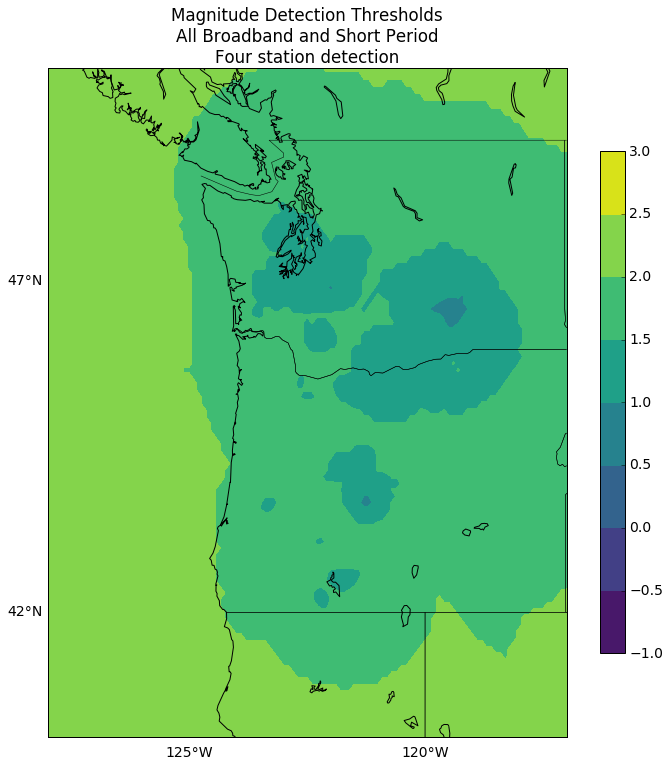

In [46]:
path = grid_paths['bb_pnsn']['detection']

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Magnitude Detection Thresholds' \
--title2='All Broadband and Short Period' \
--title3='Four station detection' \
--plotwidth=15 \
--color=viridis \
--levels=-1,-0.5,0,0.5,1,1.5,2,2.5,3

### Detection Run 3: Diff after removing all SP
Increase in detection after removing analog short period stations (rack)

Clone one grid and then set clones grid to diff of other two

In [47]:
grid_diff_detection=grid_all_detection.copy("diff_detection", "diff_no_rack")
grid_diff_detection.matrix=grid_bb_detection.matrix - grid_all_detection.matrix
grid_diff_detection.save()

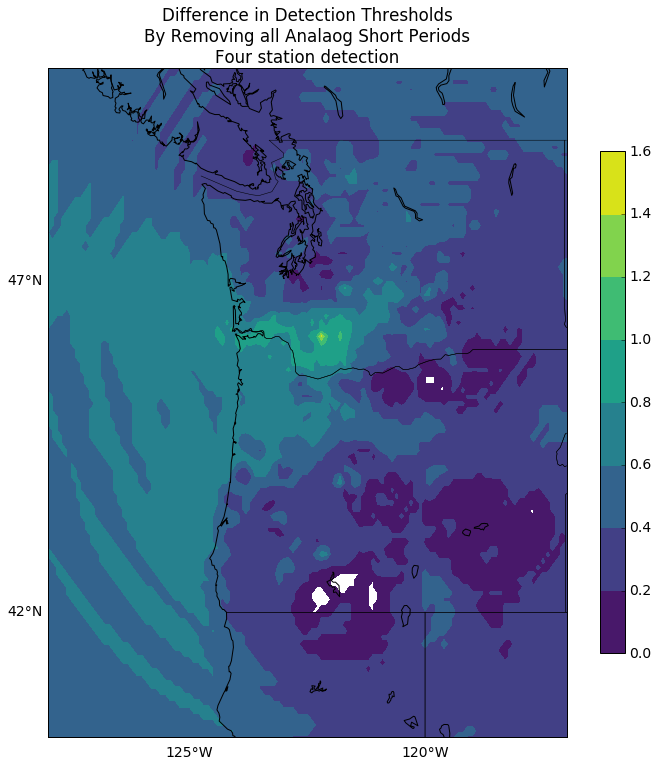

In [48]:
path = grid_diff_detection.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Difference in Detection Thresholds' \
--title2='By Removing all Analaog Short Periods' \
--title3='Four station detection' \
--plotwidth=15 \
--color=viridis \
--levels=0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6

## Azimuthal Gap Plot

Azimuthal Gap using the five stations that contributed to the solution

### All BB and SP

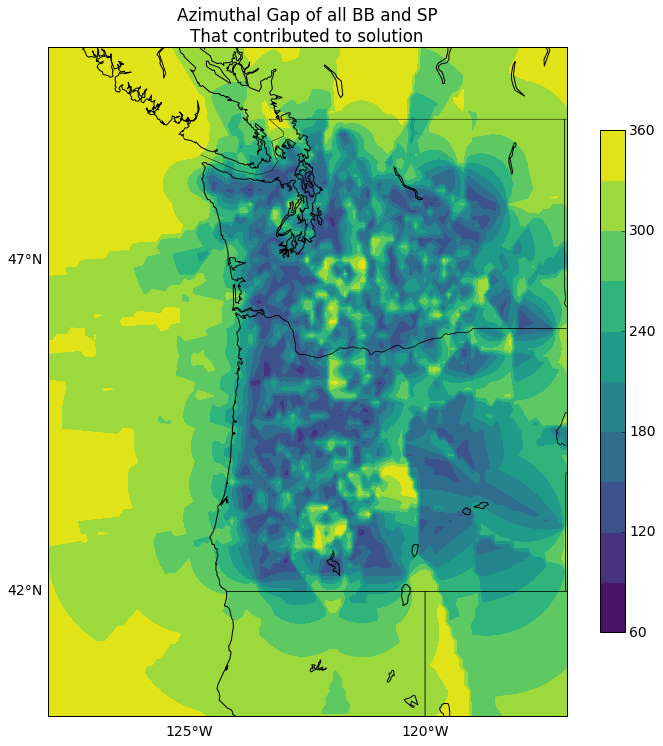

In [49]:
path = grid_paths['ehz_and_bb_pnsn']['gap']

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Azimuthal Gap of all BB and SP' \
--title2='That contributed to solution' \
--plotwidth=15 \
--color=viridis \
--levels=60,90,120,150,180,210,240,270,300,330,360

## Distance Plots

Distances to contributing stations

### Closest Contributing Station

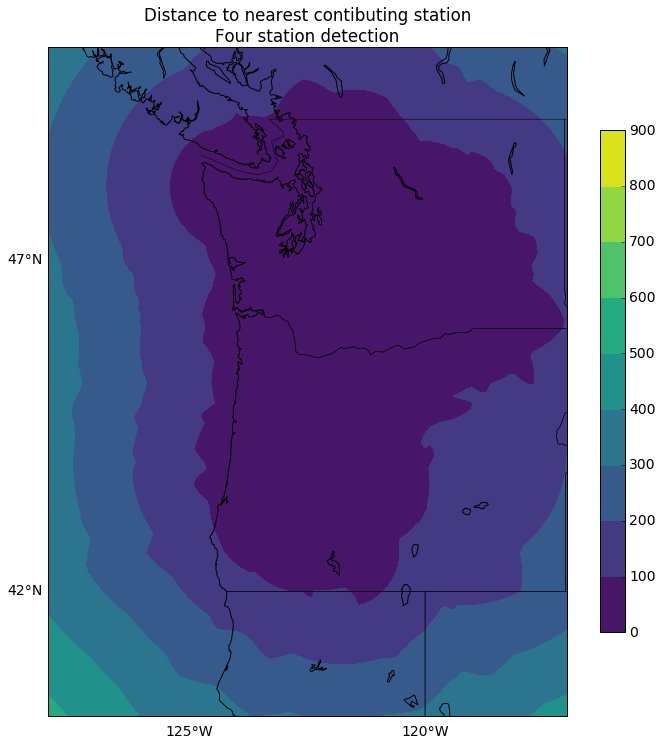

In [51]:
path = grid_paths['ehz_and_bb_pnsn']['dist_max']


%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Distance to nearest contibuting station' \
--title2='Four station detection' \
--plotwidth=15 \
--color=viridis \
--levels=0,100,200,300,400,500,600,700,800,900

### Run2:  Median Contributing Station

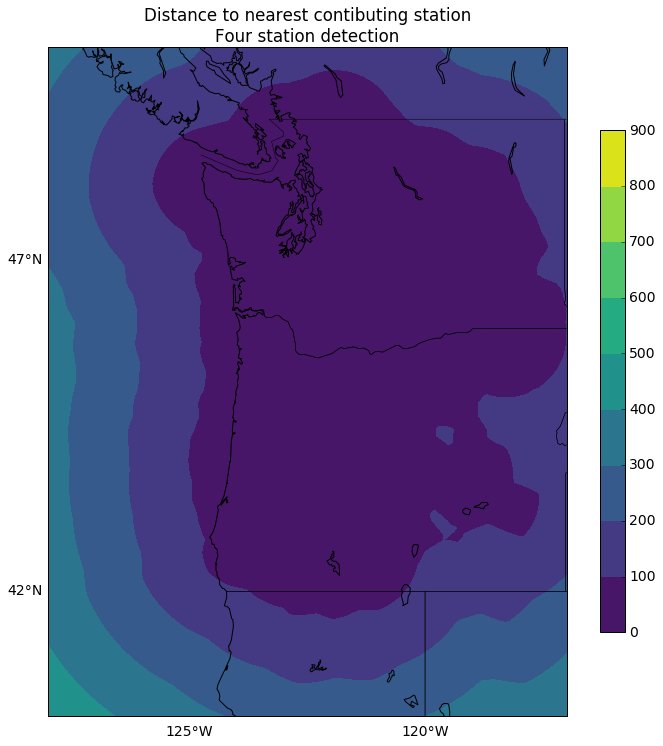

In [53]:
path = grid_paths['ehz_and_bb_pnsn']['dist_med']


%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Distance to nearest contibuting station' \
--title2='Four station detection' \
--plotwidth=15 \
--color=viridis \
--levels=0,100,200,300,400,500,600,700,800,900

### Run 3: Average Distance of Contributing Stations

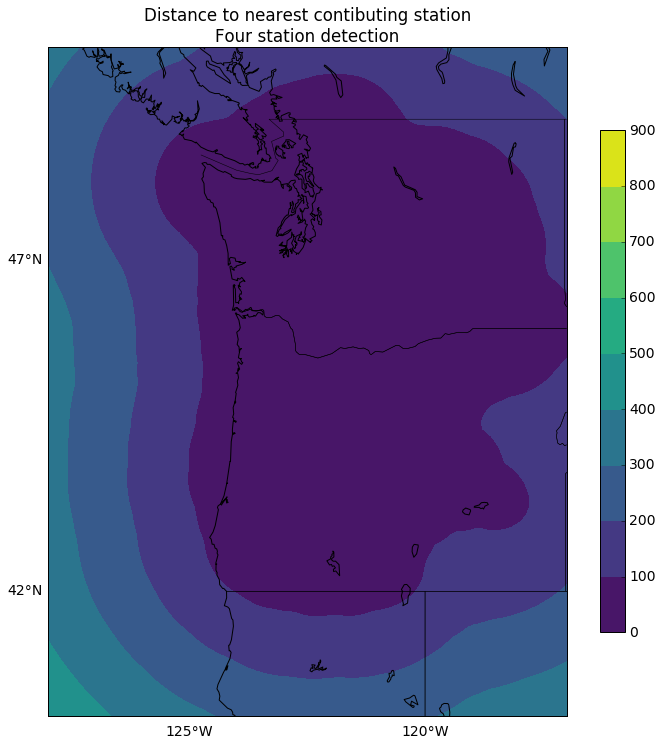

In [54]:
path = grid_paths['ehz_and_bb_pnsn']['dist_ave']


%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Distance to nearest contibuting station' \
--title2='Four station detection' \
--plotwidth=15 \
--color=viridis \
--levels=0,100,200,300,400,500,600,700,800,900

### Run 4: Furthest Contributing Station

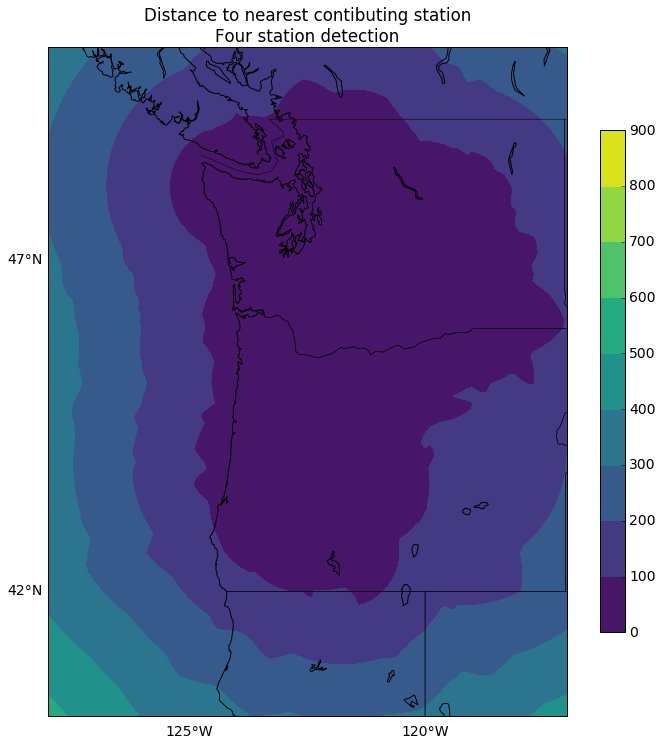

In [55]:
path = grid_paths['ehz_and_bb_pnsn']['dist_max']


%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Distance to nearest contibuting station' \
--title2='Four station detection' \
--plotwidth=15 \
--color=viridis \
--levels=0,100,200,300,400,500,600,700,800,900

## Azimuthal Gap and Distance

Combining Azimuthal Gap and Distance

### Run1 Gap + Closest Contributing Station

In [58]:
grid_gap_dist_min=grid_all_gap.copy("gap_dist_min", "gap_dist_min")

#Take log distance then normalize, add to normalized 
grid_gap_dist_min.matrix =  0.5*(np.log(grid_all_dist_min.matrix)/np.log(np.max(grid_all_dist_min.matrix)) + \
    grid_all_gap.matrix/np.max(grid_all_gap.matrix))
grid_gap_dist_min.save()

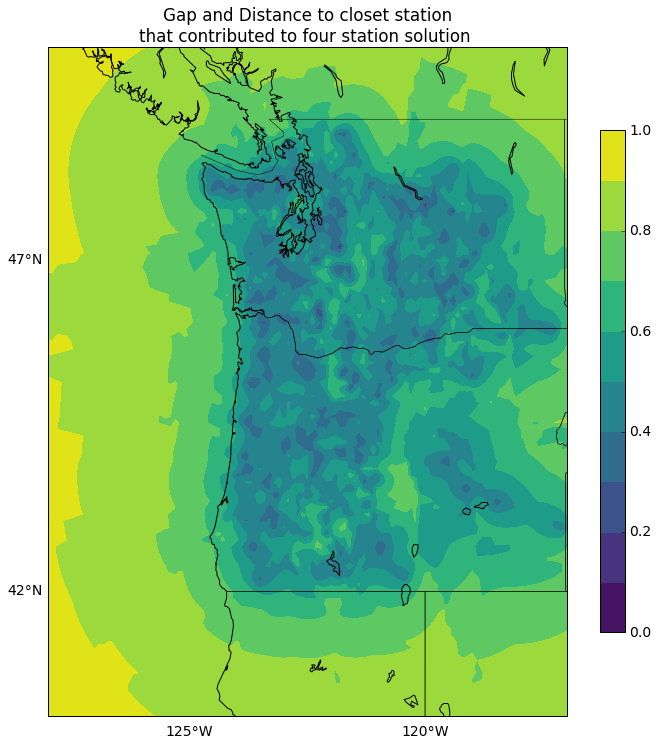

In [66]:
path = grid_gap_dist_min.get_path()

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Gap and Distance to closet station' \
--title2='that contributed to four station solution ' \
--plotwidth=15 \
--color=viridis \
--levels=0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1

### Run 2: Gap + Median Contributing Station

In [63]:
grid_gap_dist_med=grid_all_gap.copy("gap_dist_med", "gap_dist_med")
#Take log distance then normalize, add to normalized gap

grid_gap_dist_med.matrix =  0.5*(np.log(grid_all_dist_med.matrix)/np.log(np.max(grid_all_dist_med.matrix)) + \
    grid_all_gap.matrix/np.max(grid_all_gap.matrix))

grid_gap_dist_med.save()

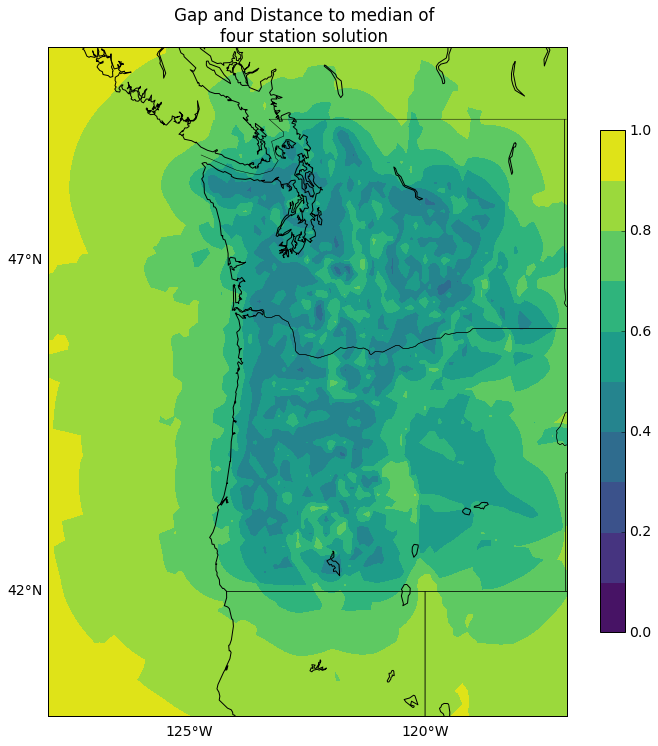

In [68]:
path = grid_gap_dist_med.get_path()

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Gap and Distance to median of ' \
--title2='four station solution ' \
--plotwidth=15 \
--color=viridis \
--levels=0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1

### Run 3: Gap + Ave Contributing Station

Take log distance then normalize, add to normalized gap

In [75]:
grid_gap_dist_ave=grid_all_gap.copy("gap_dist_ave", "gap_dist_ave")
#Take log distance then normalize, add to normalized gap

grid_gap_dist_ave.matrix =  0.5*(np.log(grid_all_dist_ave.matrix)/np.log(np.max(grid_all_dist_ave.matrix)) + \
    grid_all_gap.matrix/np.max(grid_all_gap.matrix))

grid_gap_dist_ave.save()

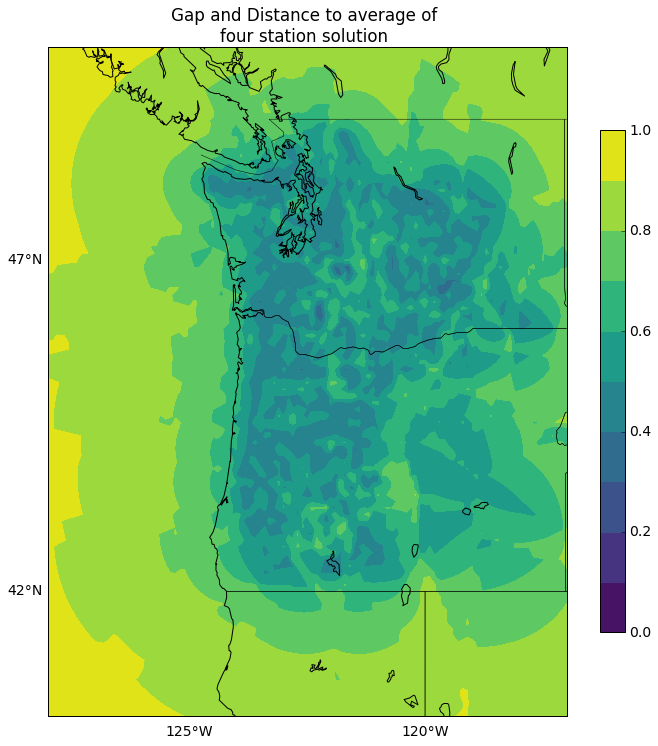

In [76]:
path = grid_gap_dist_ave.get_path()

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Gap and Distance to average of ' \
--title2='four station solution ' \
--plotwidth=15 \
--color=viridis \
--levels=0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1

### Run 4: Gap + Max Contributing Station

In [73]:
grid_gap_dist_max=grid_all_gap.copy("gap_dist_max", "gap_dist_max")
#Take log distance then normalize, add to normalized gap

grid_gap_dist_max.matrix =  0.5*(np.log(grid_all_dist_max.matrix)/np.log(np.max(grid_all_dist_max.matrix)) + \
    grid_all_gap.matrix/np.max(grid_all_gap.matrix))

grid_gap_dist_max.save()

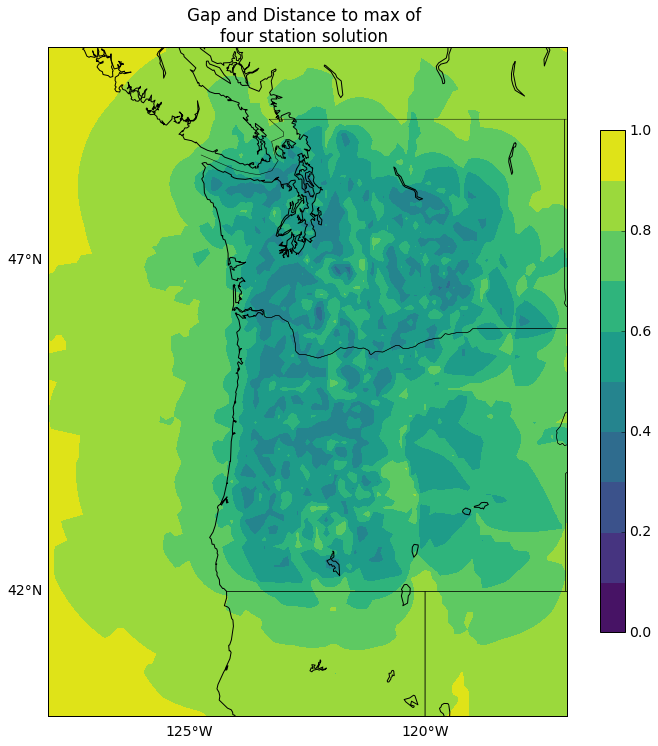

In [74]:
path = grid_gap_dist_max.get_path()

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Gap and Distance to max of ' \
--title2='four station solution ' \
--plotwidth=15 \
--color=viridis \
--levels=0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1